In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
#Load in the dataset 

institute_data = pd.read_csv("cleaned_institution_data.csv")
institute_data

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
1,University of Alabama at Birmingham,4,1,555.0,555.0,NaN,25.0,27.0,23.0,NaN,0.451035,0.513963,0.571058,24347.0,0.057
2,Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160173,0.230769,0.332468,17680.0,0.110
3,University of Alabama in Huntsville,4,1,630.0,565.0,NaN,28.0,30.0,27.0,NaN,0.502003,0.548509,0.588311,23441.0,0.059
4,Alabama State University,4,1,480.0,465.0,NaN,18.0,17.0,17.0,NaN,0.136110,0.218587,0.289705,21476.0,0.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Northeastern University Lifelong Learning Network,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752574,0.786945,0.830500,NaN,0.020
1880,Arizona State University-Skysong,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535661,0.584856,0.626920,24636.0,0.062
1881,University of Florida-Online,3,1,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
1882,Georgia Military College,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201250,0.255176,0.325070,12321.0,0.188


In [ ]:
#Dataset subset with ACT composite score 
#Easier to make a new subset because some rows have null values for ACTMMID, all rows do not have complete SAT/ACT information 

ACTCOMP = institute_data[institute_data['ACTCMMID'].notnull()].drop(["SATVRMID", "SATMTMID", "SATWRMID", "ACTENMID", "ACTMTMID","ACTWRMID"], axis=1)
ACTCOMP.head()

,INSTNM,HIGHDEG,CONTROL,ACTCMMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,18.0,0.173469,0.253155,0.331126,22489.0,0.182
1,University of Alabama at Birmingham,4,1,25.0,0.451035,0.513963,0.571058,24347.0,0.057
3,University of Alabama in Huntsville,4,1,28.0,0.502003,0.548509,0.588311,23441.0,0.059
4,Alabama State University,4,1,18.0,0.136110,0.218587,0.289705,21476.0,0.203
5,The University of Alabama,4,1,27.0,0.546711,0.601944,0.635813,29424.0,0.051


In [ ]:
#Split into train and test set
X = ACTCOMP[["HIGHDEG", "CONTROL", "ACTCMMID", "COSTT4_A"]]
y = ACTCOMP[["RPY_1YR_RT"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [ ]:
#Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
print("Training Score:" , reg.score(X_train, y_train))
y_pred = reg.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Training Score: 0.5262474937196848
MAE: 0.08946529176258883
MSE: 0.01299272128925336
RMSE: 0.11398561878260502
R2 Score: 0.5341459667106988


Training score is only around 0.5 and resulting testing R2 score is also around there. Linear model doesn't fit data very well. 
The error (RMSE) is around 10%, meaning that this model's repayment predictions are on average 10% off from the true value. 

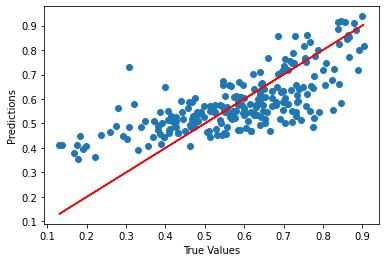

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r');

Linear model doesn't do a great job of predicting with ACT composite score. 

In [ ]:
#Dataset subset with SAT scores (all SAT columns)

SATSCOR = institute_data[institute_data['SATVRMID'].notnull() & institute_data["SATMTMID"].notnull() & institute_data["SATWRMID"].notnull()].drop(["ACTCMMID", "ACTENMID", "ACTMTMID","ACTWRMID"], axis=1)
SATSCOR.head()

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,0.173469,0.253155,0.331126,22489.0,0.182
5,The University of Alabama,4,1,590.0,580.0,540.0,0.546711,0.601944,0.635813,29424.0,0.051
8,Auburn University,4,1,615.0,615.0,570.0,0.683124,0.723961,0.780623,31282.0,0.036
10,Faulkner University,4,2,530.0,575.0,470.0,0.243713,0.308162,0.397230,33944.0,0.125
16,University of West Alabama,4,1,480.0,460.0,475.0,0.315612,0.366730,0.427191,20692.0,0.078


In [ ]:
#Split into train and test set
X = SATSCOR[["HIGHDEG", "CONTROL", "SATVRMID", "SATMTMID", "SATWRMID","COSTT4_A"]]
y = SATSCOR[["RPY_1YR_RT"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
print("Training Score:" , reg.score(X_train, y_train))
y_pred = reg.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

Training Score: 0.5511129090276905
MAE: 0.08756514158356157
MSE: 0.011773833760708109
RMSE: 0.10850729819098856
R2 Score: 0.516190955972549


Training score is a little higher than the ACT training score but the testing R2 score performs worse. Data still not linear. 
The error (RMSE) is around 10%, meaning that this model's repayment predictions are on average 10% off from the true value.

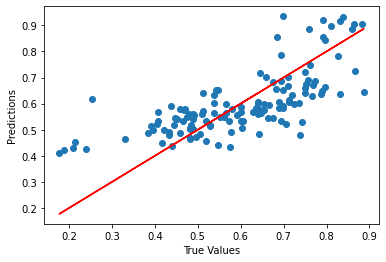

In [ ]:
#Visualization of predictions versus actual salaries
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y_test, y_test, 'r');